# Aula 5 - Python


## 1. Leitura de Arquivos e Imagens


### 1.1. Exemplo de acesso de Arquivos


In [1]:
import os

inteiros = [0000, 1011, 1101, 1110, 11101,
            1101001, 10101110, 1010111, 1001, 10110, 0]
nome_arquivo = "teste.txt"
metodo = "w"  # método de escrita

# verifica se o arquivo existe no diretório para determinar o método correto
if not os.path.exists(nome_arquivo):
    metodo = "x"

with open(nome_arquivo, metodo) as arquivo:
    for item in inteiros:
        arquivo.write(f"{item}\n")

In [2]:
with open(nome_arquivo, "r") as arquivo_leitura:
    conteudo = arquivo_leitura.read()
    print(conteudo)

0
1011
1101
1110
11101
1101001
10101110
1010111
1001
10110
0



### 1.2. Exemplo de acesso de Imagens


In [ ]:
# Download de imagem direto de link na internet
import requests

url_imagem = "https://avatars.githubusercontent.com/u/40245413"
response = requests.get(url_imagem)

if response.status_code == 200:
    with open("Prog101.jpg", "wb") as f:
        f.write(response.content)
    print("Imagem baixada com sucesso!")
else:
    print("Falha ao baixar a imagem.")

Imagem baixada com sucesso!


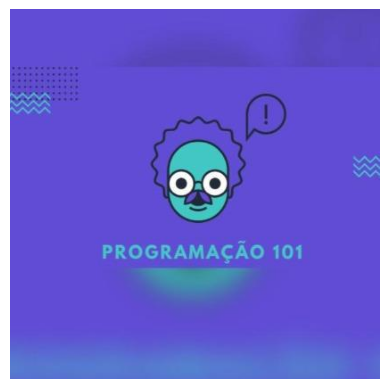

Tamanho da imagem: (415, 415)
Formato da imagem: JPEG
Modo de cores da imagem: RGB


In [4]:
from PIL import Image
import matplotlib.pyplot as plt

# a imagem tem que estar no diretório/pasta para conseguir acessar
imagem = Image.open("Prog101.jpg")
plt.imshow(imagem)
plt.axis("off")
plt.show()

print(f"Tamanho da imagem: {imagem.size}")
print(f"Formato da imagem: {imagem.format}")
print(f"Modo de cores da imagem: {imagem.mode}")

nova_imagem = imagem.resize((200, 200))
nova_imagem.show()
nova_imagem.save("Prog101_resize.jpg")

## 2. Brincando com Dados


Você pode importar uma planilha/base de dados abrindo o arquivo e salvando como um dataframe do pandas, ou então pode abrir do seu próprio drive.


In [5]:
# from google.colab import drive
# drive.mount("/content/drive")

# import pandas as pd
# file_path = "/content/drive/MyDrive/datasets/exemplo.csv"
# df = pd.read_csv(file_path)
# df.head()

### 2.1. Base Iris


O conjunto de dados contém informações sobre 150 amostras de flores da espécie Iris, divididas em três classes de espécies:

Iris setosa

Iris versicolor

Iris virginica

Cada amostra de flor contém quatro características morfológicas medidas em centímetros, que são usadas como variáveis preditivas. A tarefa geralmente associada a este dataset é classificar cada amostra de flor em uma das três espécies com base nessas quatro características.

No seu código, você nomeou as colunas do dataset da seguinte forma:

- sepal_length: Comprimento da sépala (em centímetros).
- sepal_width: Largura da sépala (em centímetros).
- petal_length: Comprimento da pétala (em centímetros).
- petal_width: Largura da pétala (em centímetros).
- class: A espécie da flor, que é a variável de saída ou alvo (target). As espécies possíveis são a Iris-setosa, Iris-versicolor ou a Iris-virginica.

Essa base é utilizada principalmente como exemplo para ciência de dados e aprendizado de máquina.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Importando uma base de dados pública da UCI Machine Learning Repository por meio da URL.


In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
colunas = [
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width",
    "class"
]
iris = pd.read_csv(url, names=colunas)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 



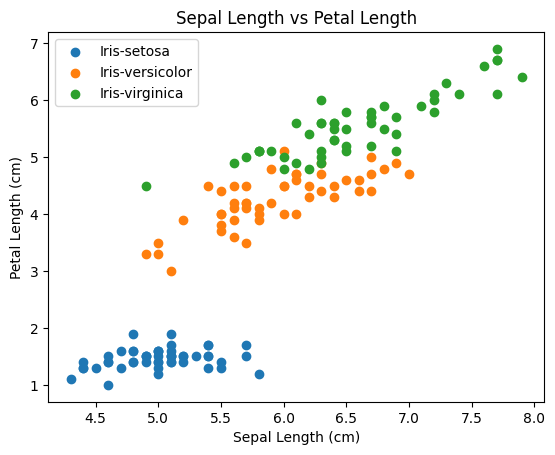

In [8]:
# usando o pandas para agrupar os dados por espécie
species = iris["class"].unique()
print(species, "\n")

for specie in species:
    subset = iris[iris["class"] == specie]
    plt.scatter(subset["sepal_length"], subset["petal_length"], label=specie)

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Sepal Length vs Petal Length")
plt.legend()
plt.show()

### 3.1 Exemplo de Plot em 3D


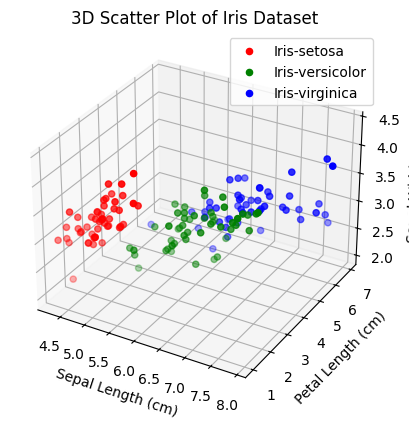

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

colors = {"Iris-setosa": "r", "Iris-versicolor": "g", "Iris-virginica": "b"}

for specie in iris["class"].unique():
    subset = iris[iris["class"] == specie]
    ax.scatter(
        subset["sepal_length"],
        subset["petal_length"],
        subset["sepal_width"],
        label=specie, c=colors[specie]
    )

ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Sepal Width (cm)")
plt.title("3D Scatter Plot of Iris Dataset")

plt.legend()
plt.show()

### 3.2 Exemplo de Plot 3D Interativo usando **Plotly**


In [10]:
fig = px.scatter_3d(
    iris,
    x="sepal_length",
    y="petal_length",
    z="sepal_width",
    color="class",
    labels={"class": "Species"},
    title="3D Scatter Plot of Iris Dataset"
)

fig.show()

## 4. Como treinar Python?


Exercícios de maratonas são bons para desenvolver o raciocínio lógico e, ainda, exercitar a sintaxe. Sites como [Beecrowd](https://beecrowd.com/pt/), [Neps Academy](https://neps.academy/br/login) e [Code Forces](https://codeforces.com/). O [Python Tutor](https://pythontutor.com/) pode ajudar a visualizar e tirar dúvidas da linguagem.

A maioria das bibliotecas possuem documentações que explicam seu uso. Por exemplo, temos a documentação da [Numpy](https://numpy.org/doc/2.1/user/index.html#user), [Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) e [Matplotlib](https://matplotlib.org/stable/users/index.html).

Existem muitos vídeos/cursos no YouTube e em outras plataformas de python, tanto em português como em inglês, do básico ao avançado.


## 5. Estoque


Jorgito decidiu abrir uma loja de roupas. Para isso, ele fez um estoque inicial com 50 camisas, 30 bermudas e 10 pares de tênis. Jorgito precisa armazenar a quantidade de itens em seu estoque e, para isso, ele precisa que implemente um sistema para ele. Quando um cliente for realizar a compra desses produtos, deve-se verificar se existe a quantidade necessária em estoque. Caso tenha a quantidade necessária, deve-se subtrair as peças adquiridas. Caso não tenha a quantidade necessária, deve-se exibir uma mensagem indicando que não possui o número desejado de peças.

---

**Exemplo de Execução:**

_Inputs do usuário_

> **Deseja comprar algo? (S/N):** S
>
> **Digite c para comprar camisa, b para bermuda e t para tênis:** c
>
> **Digite a quantidade que deseja:** 49
>
> **Deseja comprar algo? (S/N):** S
>
> **Digite c para comprar camisa, b para bermuda e t para tênis:** b
>
> **Digite a quantidade que deseja:** 28
>
> **Deseja comprar algo? (S/N):** S
>
> **Digite c para comprar camisa, b para bermuda e t para tênis:** t
>
> **Digite a quantidade que deseja:** 7
>
> **Deseja comprar algo? (S/N):** N

_Outputs do programa_

> Ok
>
> ok
>
> Ok
>
> ok
>
> Ok
>
> ok
>
> `{'c': 1, 'b': 2, 't': 3}`


### 5.1. Estoque - Resposta


In [11]:
estoque = {
    "c": 50,
    "b": 30,
    "t": 10
}

while True:
    pergunta = input("Deseja comprar algo? (S/N): ")

    if pergunta == "S":
        compra = input(
            "Digite c para comprar camisa, b para bermuda e t para tenis: ")
        quantidade = int(input("Digite a quantidade que deseja: "))

        for sigla in estoque.keys():

            if compra not in estoque.keys():
                print("Item não existe!")
                break

            if compra == sigla:
                print("Ok")
                if quantidade > estoque[sigla]:
                    print("Não tem a quantidade suficiente no estoque!")
                else:
                    print("ok")
                    estoque[sigla] -= quantidade

    else:
        print(estoque)
        break

Ok
ok
Ok
ok
Ok
ok
{'c': 1, 'b': 2, 't': 3}
